# Word Embedding

<center>Resources</center>

https://medium.com/analytics-vidhya/maths-behind-word2vec-explained-38d74f32726b

https://www.quora.com/What-are-the-advantages-and-disadvantages-of-Word2vec-and-GloVe

In [9]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000 # Size of vocab
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

In [10]:
print(
    x_train.shape,
    x_test.shape,
)

(25000, 20) (25000, 20)


In [11]:
# Adapted from Chollet (2018)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen)) # Note that word embedding encodes each word into a vector. The output is shape (samples, # words (=20), embedded vector size (=8)) 
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics = ['acc'])

model.summary()

history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = .2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 92us/sample - loss: 0.6713 - acc: 0.6155 - val_loss: 0.6231 - val_acc: 0.6932
Epoch 2/10
20000/20000 [==============================] - 1s 42us/sample - loss: 0.5454 - acc: 0.7493 - val_loss: 0.5268 - val_acc: 0.7264
Epoch 3/10
20000/20000 [=============================

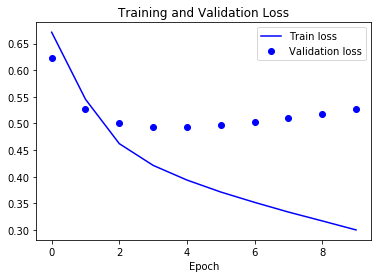

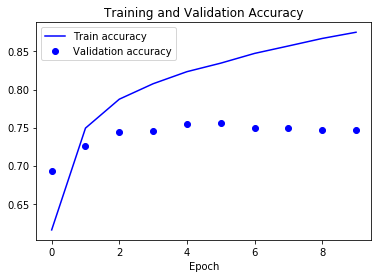

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(10),history.history['loss'], 'b', label  = 'Train loss')
plt.plot(np.arange(10),history.history['val_loss'], 'bo', label  = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

plt.plot(np.arange(10),history.history['acc'], 'b', label  = 'Train accuracy')
plt.plot(np.arange(10), history.history['val_acc'], 'bo', label  = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### How word embedding works
* Scans across each sentence with a window
* The center word and m words around it are associated
* The goal is to maximize the likelihood that you would observe the context words given the center word
  * Likelihood = the probability of observing data in your model
  * Maximum likelihood = maximizing the probability that you would observe an example in your model. This is a logical extension of training a model on data.
* This can be quantified by multiplying the probablilities of seeing 

### 1. Type of Data
* Natural language data, tokenized by word

### 2. Use Case
*

### 3. Application
*

### 4. Basic Concept
* Word embedding: associate each word with a floating point vector which can be much shorter than a one-hot encoded vector. 
* The idea is to geometrically map the meanings of the words - the example Chollet gave was female being a geometric transformation of king that produces queen (2018, p. 185)
* The important part is learning the associations between words to make the geometric mapping possible
* The likelihood is $\Pi_{t=1}^{T}\Pi_{-m\le j \le m}P(w_{t+j}|w_{t};\theta)$ where Wt+j is the context word and Wt is the center word
* Conditional probability takes the form ${P(w_{t+j}\cap w_{t})\over P(w_{t})}$
* The top of the conditional probability can be linked to the dot product of two vectors, $U_{w}$ and $V_{w}$, where Uw is the vector of the weights of center word and Vw is the vector of weights of the context words. This dot product embodies the "similarity" between each center word in $U_{w}$  and each corresponding context word. The bottom can be connected to regularization, which is done using softmax
* $\theta$ encompasses $U_{w}$ and $V_{w}$, meaning the conditional probability can be expressed as $softmax(\theta_{u}^\top \theta_{v})$
* Thus the final formula is $J(\theta) = {-1\over T}\Sigma_{t=1}^{T}\Sigma_{-m\le j\le m, j \ne 0} \log(softmax(\theta_{u}^\top \theta_{v}))$. This is the loss function used.

### 5. Assumptions
* Words have relations which can be geometrically mapped (a strong assumption)
* The words around a particular word are good indicators of the meaning of the word.
* Negative sampling (the dot product method above)

### 6. Existing solutions
* Keras embedding layer
* Word2Vec (a preexisting set of word vectors)
* GloVe (a preexisting set of word vectors)

### 7. Strengths and Weaknesses
#### Strengths
* Good at conveying word relations

#### Weaknesses
* Add another computationally expensive stage
* If words are out of vocabulary, they are not well considered
* Seperation of words like good and bad that have similar contexts but very different meanings
* Can be difficult to train